In [2]:
from fastbook import search_images_ddg

/home/mark/miniconda3/envs/py10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
def search_images(term, max_images=20):
    return search_images_ddg(term, max_images);

In [22]:
urls = search_images('bird photos', 1)
urls[0]

'https://wallup.net/wp-content/uploads/2018/10/07/766928-warbler-bird-birds-nature-wildlife.jpg'

In [24]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

Path('bird.jpg')

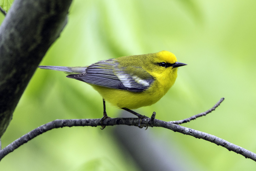

In [25]:
import fastai.vision.all as fva
im = fva.Image.open(dest)
im.to_thumb(256, 256)

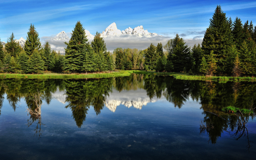

In [30]:
download_url(search_images('forest photos', 1)[0], 'forest.jpg', show_progress=False)
imf = fva.Image.open('forest.jpg').to_thumb(256, 256)
imf

In [43]:
searches = 'forest', 'bird'
path = fva.Path('bird_not_bird')
for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    fva.download_images(dest, urls=search_images(f'{o} photo'))
    fva.download_images(dest, urls=search_images(f'{o} sun photo'))
    fva.download_images(dest, urls=search_images(f'{o} shade photo'))
    fva.resize_images(dest, max_size=400, dest=dest)

In [45]:
fva.get_image_files(path)

(#110) [Path('bird_not_bird/bird/ed483e91-b639-4b30-a9e6-4e93ac6bfedd.jpeg'),Path('bird_not_bird/bird/dce33114-366a-4d78-b553-51001e4c4388.JPG'),Path('bird_not_bird/bird/d6201ed7-bf3f-49ba-bd09-befecb75f806.jpg'),Path('bird_not_bird/bird/548e0dfe-2d26-4678-b480-23fb8ece2975.jpg'),Path('bird_not_bird/bird/5dbe4f01-ad95-4a4d-b704-808d5a344985.jpg'),Path('bird_not_bird/bird/80911de0-7b8d-4cfd-b2cd-fa68f726dbba.jpg'),Path('bird_not_bird/bird/1376837d-9102-487a-8ace-25550cc9da82.jpg'),Path('bird_not_bird/bird/f2b0ec98-a64f-4a05-b5af-0c44f755e88d.jpg'),Path('bird_not_bird/bird/e8914876-9a06-408c-b681-f2ec50667152.jpg'),Path('bird_not_bird/bird/31d4f2c1-0f7a-4bfd-93c1-cb7a46d91b9c.jpg')...]

In [47]:
failed = fva.verify_images(fva.get_image_files(path))
failed.map(fva.Path.unlink)
len(failed)

5

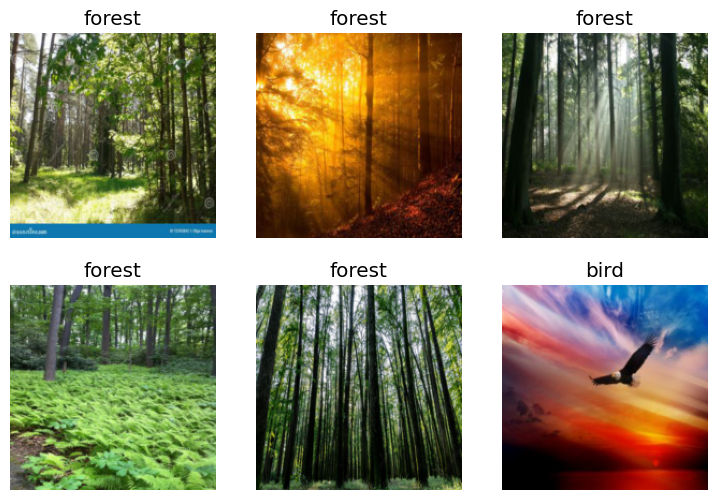

In [54]:
dls = fva.DataBlock(
    blocks=(fva.ImageBlock, fva.CategoryBlock),
    get_items=fva.get_image_files,
    splitter=fva.RandomSplitter(valid_pct=0.2, seed=42),
    get_y=fva.parent_label,
    item_tfms=[fva.Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [67]:
learn = fva.vision_learner(
    dls, 
    fva.resnet18, 
    metrics=fva.error_rate
)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.313352,2.105184,0.476190,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.047184,1.664537,0.476190,00:01
1,0.863341,1.208825,0.428571,00:01
2,0.656011,0.703318,0.285714,00:01
3,0.510338,0.387789,0.142857,00:01
4,0.408656,0.241614,0.095238,00:01


In [69]:
is_bird,_,probs = learn.predict(fva.PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
